<a href="https://colab.research.google.com/github/wilmercin007/wilmercin007/blob/main/ANN_MOV_MASA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MODELO DE REDES NEURONALES ARTIFICIALES PARA SUSCEPTIBILIDAD DE MOVIMIENTOS EN MASA**

In [ ]:
#Importar librerías
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Importar Base de Datos
from google.colab import files
files.upload()

Saving TRAINING.csv to TRAINING (2).csv


{'TRAINING.csv': b'PMA,GEOMORFOLOGIA,GEOLOGIA,TWI,DISTANCIA,ASPECTO,CURVATURA,PENDIENTE,ALTITUD,USOSUELO,MOVMASA\r\n2,3,3,2,1,7,2,3,2,4,1\r\n2,3,3,1,3,6,3,4,3,2,1\r\n1,4,4,3,1,8,1,2,2,1,1\r\n2,4,4,3,1,10,3,2,1,4,1\r\n1,2,4,4,1,10,3,1,2,2,1\r\n2,3,3,2,1,7,1,1,3,2,1\r\n2,3,3,2,1,9,3,3,2,2,1\r\n2,3,3,3,1,8,3,3,2,4,1\r\n2,4,4,2,1,5,3,2,2,2,1\r\n1,4,4,5,1,5,3,1,2,2,1\r\n2,3,3,3,1,5,1,1,2,2,1\r\n2,4,3,1,2,4,3,3,2,2,1\r\n2,3,1,1,1,5,1,3,2,3,1\r\n1,3,2,2,1,7,3,3,2,4,1\r\n1,4,3,2,2,5,3,3,2,3,1\r\n2,2,4,4,1,9,3,1,1,2,1\r\n2,4,4,2,1,9,3,3,2,3,1\r\n2,3,3,5,1,6,3,1,1,4,1\r\n2,4,3,2,1,10,1,2,2,2,1\r\n2,4,3,2,1,10,1,2,2,2,1\r\n2,3,3,2,1,9,2,2,2,2,1\r\n2,4,4,2,1,5,3,1,2,1,1\r\n2,3,6,2,1,4,1,1,2,2,1\r\n2,3,6,2,1,4,1,1,2,2,1\r\n2,4,6,2,1,10,1,2,2,2,1\r\n2,3,2,2,1,8,1,2,2,3,1\r\n2,4,4,2,1,3,3,1,2,3,1\r\n2,3,2,2,1,9,1,3,2,2,1\r\n1,2,4,3,1,7,3,1,2,2,1\r\n2,3,2,2,1,7,1,3,3,4,1\r\n2,3,3,1,1,3,1,3,3,2,1\r\n1,4,3,3,1,2,3,3,2,2,1\r\n2,4,4,3,1,3,3,3,1,4,1\r\n2,3,3,2,1,5,1,3,3,2,1\r\n1,3,2,2,1,9,1,3,2,3,1\r\n2,3,

In [ ]:
#Declarar Base de Datos
path="/content/TRAINING.csv"
MOVMASA_df=pd.read_csv(path)

<Axes: xlabel='PENDIENTE', ylabel='MOVMASA'>

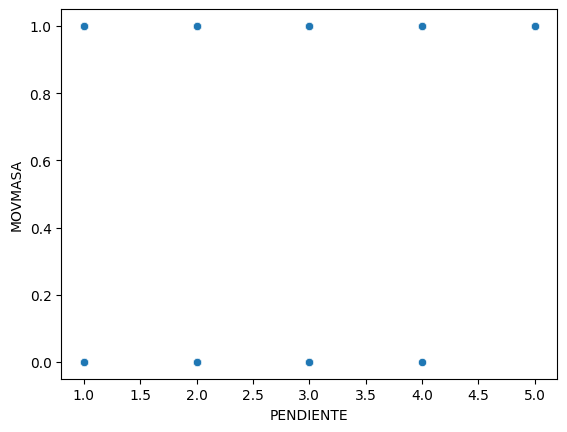

In [ ]:
#Visualización
sns.scatterplot(x='PENDIENTE',y='MOVMASA',data=MOVMASA_df)

<Axes: >

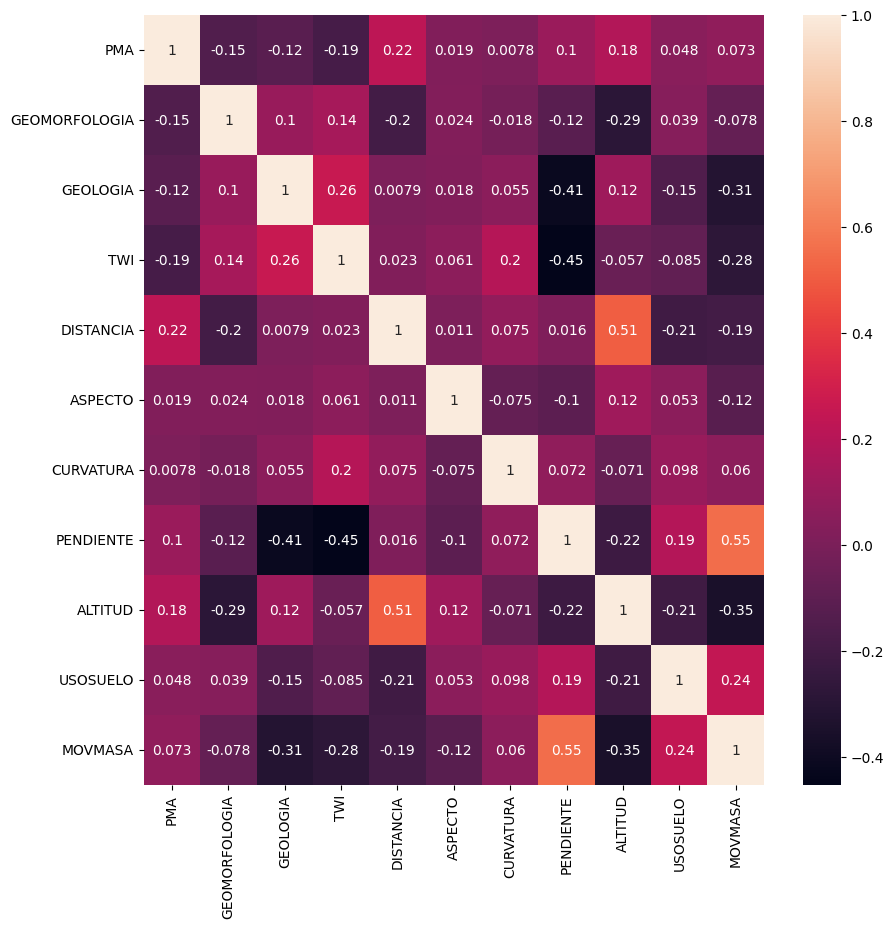

In [ ]:
#Visualizar Heatmap
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(MOVMASA_df.corr(),annot=True)

In [ ]:
#Limpieza de datos
selected_features = ['PMA','GEOMORFOLOGIA','GEOLOGIA','TWI','DISTANCIA','ASPECTO','CURVATURA','PENDIENTE','ALTITUD','USOSUELO']

In [ ]:
X = MOVMASA_df[selected_features]
Y = MOVMASA_df['MOVMASA']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

Y=Y.values.reshape(-1,1)
Y_scaled = scaler.fit_transform(Y)
#X_1 = np.array(X)
#Y=Y.values.reshape(-1,1)

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25)

In [ ]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_scaled,Y_scaled,test_size=0.25)

In [ ]:
#tr = tree.DecisionTreeClassifier(max_depth=10)
#tr.fit(X_Train, Y_Train)

In [ ]:
#y_pred = tr.predict(X_Test)

In [ ]:
#y_pred

In [ ]:
#score = tr.score(X_Test, Y_Test)
#print('Precision: %0.4f'% (score))

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=20, activation='sigmoid', input_shape=(10,)))
#model.add(tf.keras.layers.Dense(units=2, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                220       
                                                                 
Total params: 220
Trainable params: 220
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.5),loss='mean_squared_error')
epochs_hist = model.fit(X_Train, Y_Train, epochs=500,batch_size=50,validation_split=0.2)

Epoch 1/500
5/5 [==============================] - 9s 406ms/step - loss: 0.2448 - val_loss: 0.2228
Epoch 2/500
5/5 [==============================] - 0s 10ms/step - loss: 0.2258 - val_loss: 0.1785
Epoch 3/500
5/5 [==============================] - 0s 11ms/step - loss: 0.1852 - val_loss: 0.1750
Epoch 4/500
5/5 [==============================] - 0s 10ms/step - loss: 0.1737 - val_loss: 0.1483
Epoch 5/500
5/5 [==============================] - 0s 14ms/step - loss: 0.1557 - val_loss: 0.1409
Epoch 6/500
5/5 [==============================] - 0s 12ms/step - loss: 0.1469 - val_loss: 0.1333
Epoch 7/500
5/5 [==============================] - 0s 12ms/step - loss: 0.1370 - val_loss: 0.1349
Epoch 8/500
5/5 [==============================] - 0s 12ms/step - loss: 0.1329 - val_loss: 0.1229
Epoch 9/500
5/5 [==============================] - 0s 17ms/step - loss: 0.1283 - val_loss: 0.1269
Epoch 10/500
5/5 [==============================] - 1s 207ms/step - loss: 0.1239 - val_loss: 0.1217
Epoch 11/500
5/5 

<ipython-input-16-c19054bc8e12>:9: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('Pérdida de entrenamiento','Pérdida de validación')


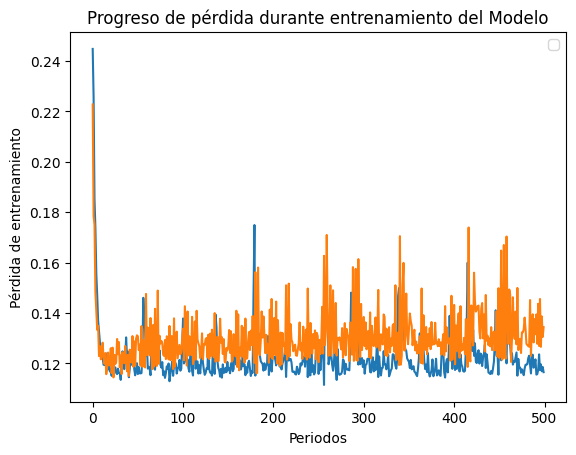

In [ ]:
#Evaluando Modelo
epochs_hist.history.keys()
#Gráfico
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Progreso de pérdida durante entrenamiento del Modelo')
plt.xlabel('Periodos')
plt.ylabel('Pérdida de entrenamiento')
plt.legend('Pérdida de entrenamiento','Pérdida de validación')

In [ ]:
#Tabla de ingreso para la predicción
X_Test_1 = np.array([[1, 2, 5, 2, 1, 1, 1, 2, 2, 1]])
scaler_1 = MinMaxScaler()
X_Test_scaled_1 = scaler_1.fit_transform(X_Test_1)
#Predicción
Y_predict_1 = model.predict(X_Test_scaled_1)

1/1 [==============================] - 0s 92ms/step
